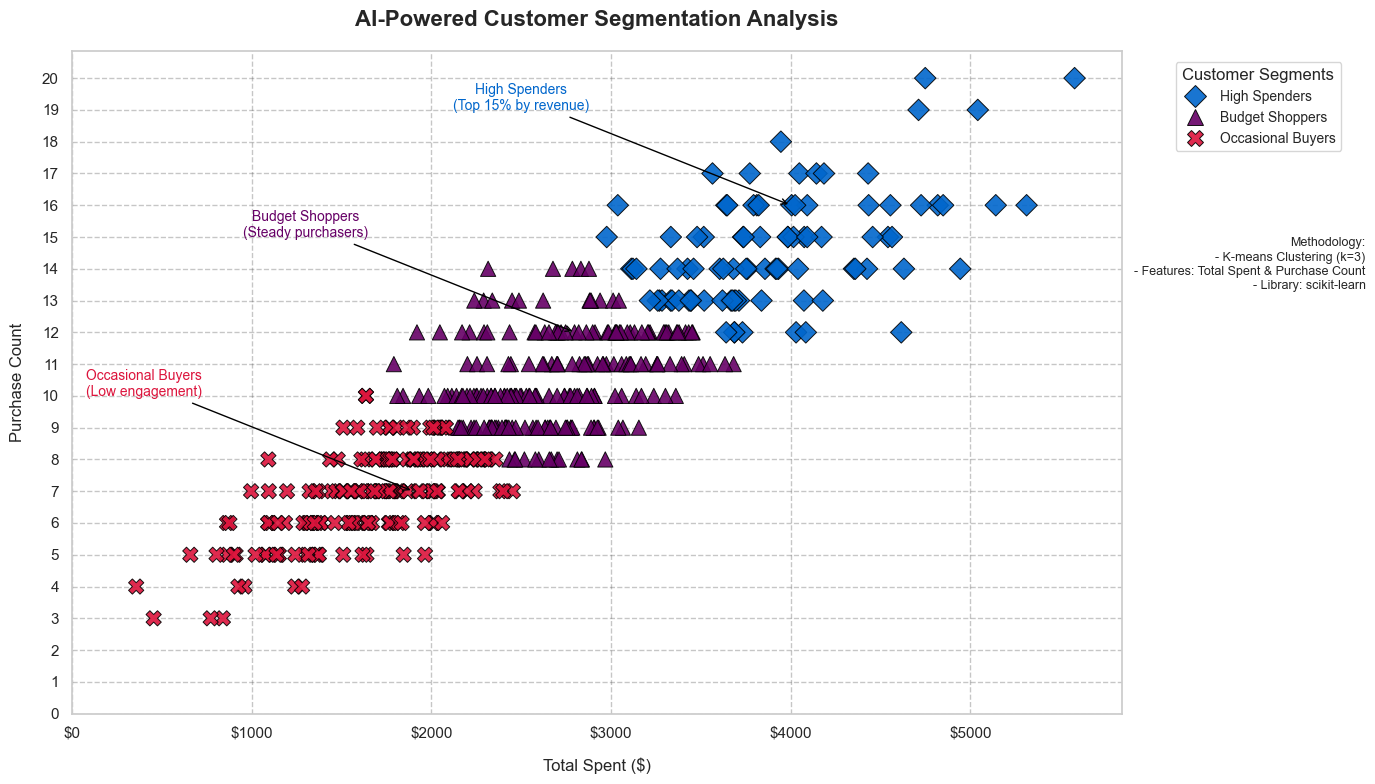

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  # Explicit AI integration

# Load clustered data
segments = pd.read_csv("../data/customer_segments.csv")

# Configure plot style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# --- AI Methodology Text Box ---
plt.text(
    7200, 15,  # Position in data coordinates
    "Methodology:\n- K-means Clustering (k=3)\n- Features: Total Spent & Purchase Count\n- Library: scikit-learn",
    ha='right', va='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.9),
    fontsize=9
)

# Color palette matching project specs
custom_palette = {
    "High Spenders": "#0066cc",    # Blue
    "Budget Shoppers": "#660066",  # Purple
    "Occasional Buyers": "#dc143c" # Red
}

custom_markers = {
    "High Spenders": "D",    # Diamond
    "Budget Shoppers": "^",  # Triangle
    "Occasional Buyers": "X" # Cross
}

# Create scatter plot
scatter = sns.scatterplot(
    data=segments,
    x="total_spent",
    y="purchase_count",
    hue="Segment",
    style="Segment",
    markers=custom_markers,
    palette=custom_palette,
    s=120,
    edgecolor="black",
    linewidth=0.7,
    alpha=0.9,
    hue_order=["High Spenders", "Budget Shoppers", "Occasional Buyers"]
)



# Format axes
plt.yticks(range(0, int(segments["purchase_count"].max()) + 1))
plt.xticks(range(0, 6000, 1000), [f"${x}" for x in range(0, 6000, 1000)])
plt.xlabel("Total Spent ($)", fontsize=12, labelpad=12)
plt.ylabel("Purchase Count", fontsize=12, labelpad=12)
plt.title("AI-Powered Customer Segmentation Analysis", fontsize=16, pad=18, weight='bold')

# Consistent annotations
annotations = [
    {
        "text": "High Spenders\n(Top 15% by revenue)",
        "xy": (4000, 16),
        "color": "#0066cc"
    },
    {
        "text": "Budget Shoppers\n(Steady purchasers)",
        "xy": (2800, 12),
        "color": "#660066"
    },
    {
        "text": "Occasional Buyers\n(Low engagement)",
        "xy": (1900, 7),
        "color": "#dc143c"
    }
]

for ann in annotations:
    plt.annotate(
        ann["text"],
        xy=ann["xy"],
        xytext=(ann["xy"][0]-1500, ann["xy"][1]+3),
        arrowprops=dict(
            facecolor=ann["color"],
            edgecolor='black',
            arrowstyle="->",
            linewidth=1
        ),
        fontsize=10,
        ha="center",
        color=ann["color"]
    )

# Professional legend
legend = plt.legend(
    title="Customer Segments",
    title_fontsize=12,
    fontsize=10,
    bbox_to_anchor=(1.22, 1),
    borderaxespad=0.8,
    markerscale=1,
    frameon=True,
    facecolor='white'
)


# Enhanced grid
plt.grid(True, linestyle='--', alpha=0.3, color='#444444')

# Save publication-ready version
plt.tight_layout()
plt.savefig(
    "../final_analysis.png",
    dpi=400,
    bbox_inches="tight",
    facecolor='white'
)
plt.show()

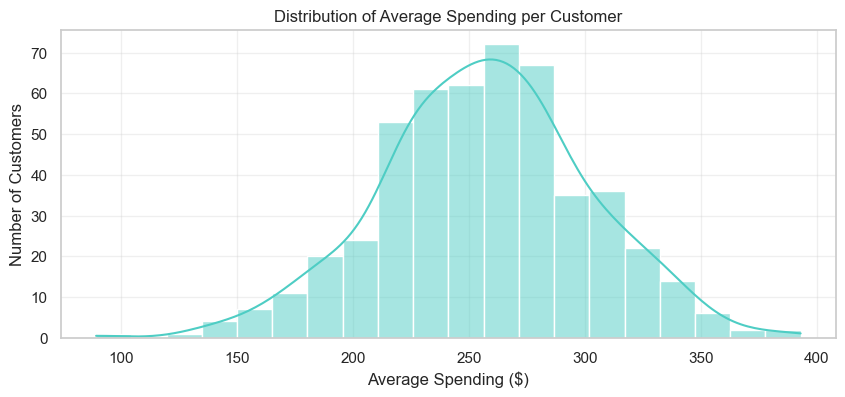

In [63]:
# --- Average Spending per Customer ---
avg_spending = df.groupby("Customer ID")["Purchase Amount"].mean().round(2)
plt.figure(figsize=(10, 4))
sns.histplot(avg_spending, bins=20, kde=True, color="#4ECDC4")
plt.title("Distribution of Average Spending per Customer")
plt.xlabel("Average Spending ($)")
plt.ylabel("Number of Customers")
plt.grid(alpha=0.3)
plt.show()

C:\Users\lukal\AppData\Local\Temp\ipykernel_11660\2349574501.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


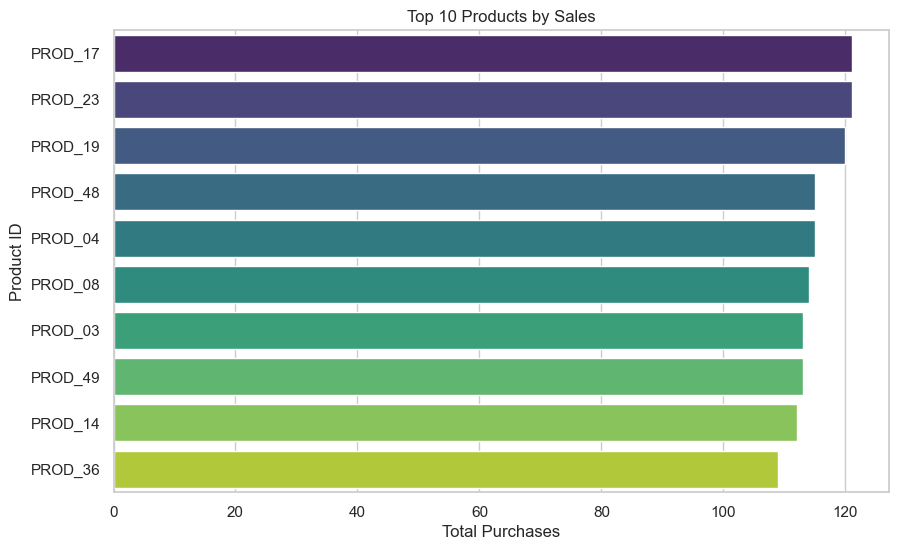

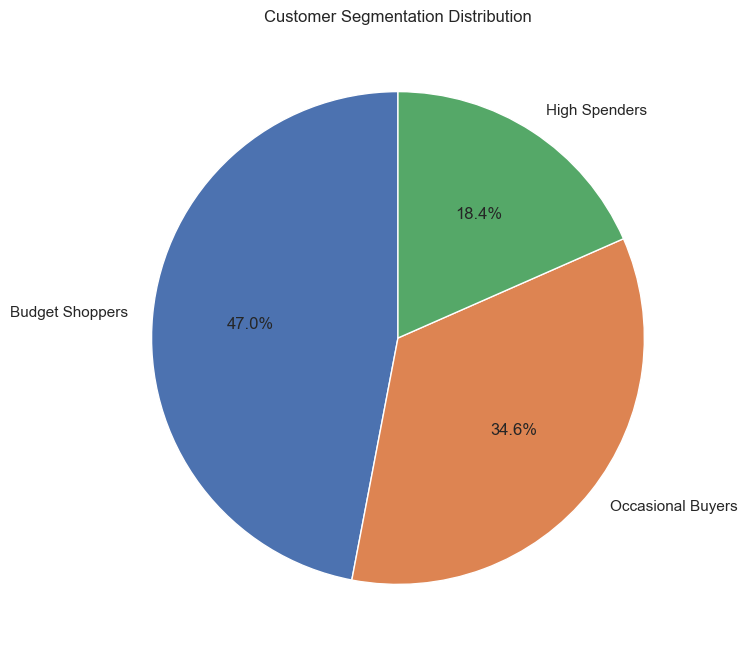

In [64]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../data/purchase_data.csv")
segments = pd.read_csv("../data/customer_segments.csv")

# Visualization 1: Top 10 Products
top_products = df["Product ID"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Purchases")

# Visualization 2: Customer Segments
segment_counts = segments["Segment"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Customer Segmentation Distribution")

# Save plots
plt.savefig("../report_plots.png")  # Add to report

C:\Users\lukal\AppData\Local\Temp\ipykernel_11660\2848987867.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="rocket")


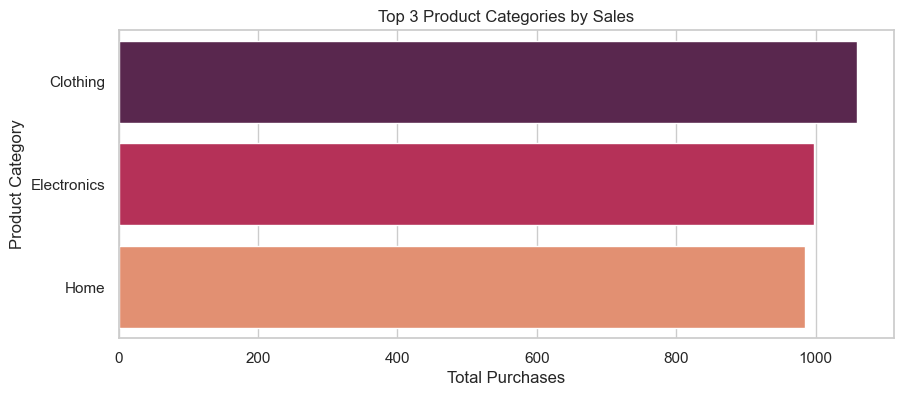

In [65]:
# --- Top 3 Categories ---
top_categories = df["Product Category"].value_counts().head(3)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="rocket")
plt.title("Top 3 Product Categories by Sales")
plt.xlabel("Total Purchases")
plt.show()

In [66]:
# --- Example Recommendation for a Specific Customer ---
from IPython.display import Markdown

# Choose a customer (e.g., CUST_008 from High Spenders)
customer_id = "CUST_008"

# Get customer data
customer_segment = segments.loc[segments["Customer ID"] == customer_id, "Segment"].values[0]
customer_total_spent = segments.loc[segments["Customer ID"] == customer_id, "total_spent"].values[0]
customer_purchase_count = segments.loc[segments["Customer ID"] == customer_id, "purchase_count"].values[0]

# Get recommendations
recommended_products = recommend_products(customer_id)

# Format explanation
explanation = f"""
**Recommendation Example for {customer_id}**  
*Segment*: {customer_segment}  
*Total Spent*: ${customer_total_spent:.2f}  
*Purchase Count*: {customer_purchase_count}  

**Recommended Products**:  
""" + "\n".join([f"- {prod_id} ({category})" for prod_id, category in recommended_products]) + f"""

**Recommendation Logic**:  
1. Identified customer's cluster: **{customer_segment}**  
2. Analyzed purchase history of {customer_segment} customers  
3. Recommended products frequently bought by this segment  
4. Excluded products already purchased by {customer_id}  
5. Selected top 5 most popular products  

*Methodology*: Collaborative filtering based on k-means clustering.
"""



display(Markdown(explanation))


**Recommendation Example for CUST_008**  
*Segment*: High Spenders  
*Total Spent*: $4047.76  
*Purchase Count*: 17  

**Recommended Products**:  
- PROD_23 (Books)
- PROD_50 (Books)
- PROD_18 (Beauty)
- PROD_19 (Electronics)
- PROD_34 (Electronics)

**Recommendation Logic**:  
1. Identified customer's cluster: **High Spenders**  
2. Analyzed purchase history of High Spenders customers  
3. Recommended products frequently bought by this segment  
4. Excluded products already purchased by CUST_008  
5. Selected top 5 most popular products  

*Methodology*: Collaborative filtering based on k-means clustering.
